<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [ ]:
df.describe().transpose()

## EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

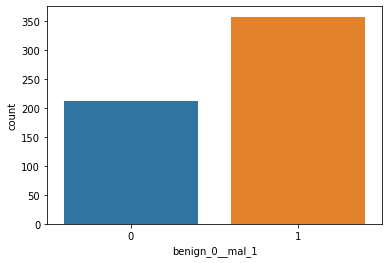

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

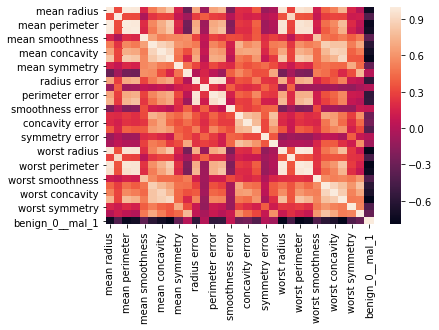

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

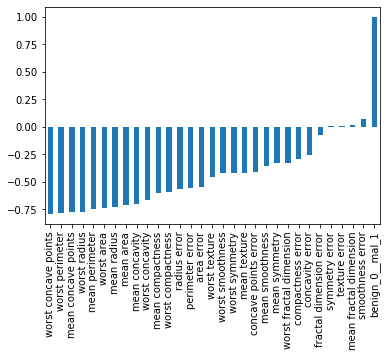

In [8]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

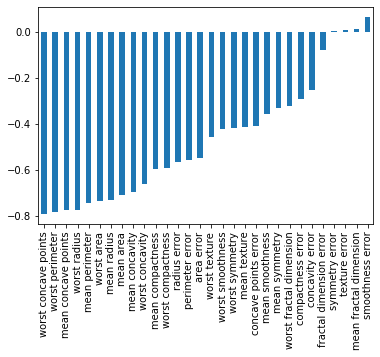

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [10]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [18]:
X_train.shape

(426, 30)

In [21]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [22]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6896 - val_loss: 0.6723
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6526 - val_loss: 0.6364
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6135 - val_loss: 0.5971
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5702 - val_loss: 0.5558
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5294 - val_loss: 0.5109
Epoch 6/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4861 - val_loss: 0.4649
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4375 - val_loss: 0.4158
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3959 - val_loss: 0.3714
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3597 - val_loss: 0.3318
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3236 - val_loss: 0.3010
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0544 - val_loss: 0.0985
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0540 - val_loss: 0.0964
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0630 - val_loss: 0.0965
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0497 - val_loss: 0.0986
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0509 - val_loss: 0.0953
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0495 - val_loss: 0.0946
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0502 - val_loss: 0.0975
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0505 - val_loss: 0.1012
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0515 - val_loss: 0.0948
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0503 - val_loss: 0.1041


14/14 [==============================] - 0s 5ms/step - loss: 0.0395 - val_loss: 0.1155
Epoch 165/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.1128
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0476 - val_loss: 0.1150
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0425 - val_loss: 0.1142
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0417 - val_loss: 0.1133
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.1140
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0416 - val_loss: 0.1091
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0417 - val_loss: 0.1216
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0434 - val_loss: 0.1108
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0420 - val_loss: 0.1249
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0368 - val_loss: 0.1368
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0327 - val_loss: 0.1217
Epoch 247/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0337 - val_loss: 0.1260
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0354 - val_loss: 0.1278
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.1221
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0377 - val_loss: 0.1275
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0372 - val_loss: 0.1406
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0344 - val_loss: 0.1303
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0326 - val_loss: 0.1308
Epoch 254/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0314 - val_loss: 0.1268
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0296 - val_loss: 0.1442
Epoch 327/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0293 - val_loss: 0.1433
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0333 - val_loss: 0.1519
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0421 - val_loss: 0.1341
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.1364
Epoch 331/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.1441
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0406 - val_loss: 0.1287
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0307 - val_loss: 0.1448
Epoch 334/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.1333
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.1426
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0316 - val_loss: 0.1454
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0391 - val_loss: 0.1475
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0275 - val_loss: 0.1554
Epoch 410/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0282 - val_loss: 0.1509
Epoch 411/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0253 - val_loss: 0.1431
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0262 - val_loss: 0.1575
Epoch 413/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.1489
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0261 - val_loss: 0.1517
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.1600
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0263 - val_loss: 0.1481
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.1714
Epoch 489/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0210 - val_loss: 0.1582
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0223 - val_loss: 0.1672
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0195 - val_loss: 0.1478
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0213 - val_loss: 0.2114
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.1487
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0252 - val_loss: 0.1878
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0252 - val_loss: 0.1475
Epoch 496/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0261 - val_loss: 0.2052
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0234 - val_loss: 0.1503
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0244 - val_loss: 0.1854
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0194 - val_loss: 0.1921
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.1801
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.1931
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0153 - val_loss: 0.1976
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0161 - val_loss: 0.1801
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.2016
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.1782
Epoch 577/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0191 - val_loss: 0.1961
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.1719
Epoc

In [23]:
# model.history.history

In [24]:
model_loss = pd.DataFrame(model.history.history)

In [25]:
# model_loss

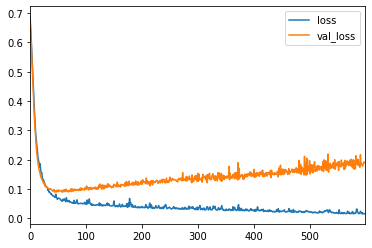

In [26]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [27]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6917 - val_loss: 0.6702
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6508 - val_loss: 0.6307
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6110 - val_loss: 0.5798
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5557 - val_loss: 0.5250
Epoch 5/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5059 - val_loss: 0.4673
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4468 - val_loss: 0.4108
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3945 - val_loss: 0.3582
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3504 - val_loss: 0.3135
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3006 - val_loss: 0.2763
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2769 - val_loss: 0.2455
Epoch 1

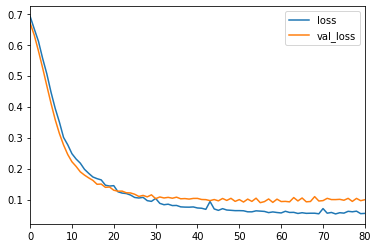

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6991 - val_loss: 0.6832
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6819 - val_loss: 0.6713
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6714 - val_loss: 0.6578
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6665 - val_loss: 0.6381
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6485 - val_loss: 0.6168
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6372 - val_loss: 0.5890
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6084 - val_loss: 0.5579
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5714 - val_loss: 0.5292
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5658 - val_loss: 0.4986
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5383 - val_loss: 0.4648
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1173 - val_loss: 0.1098
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1349 - val_loss: 0.1090
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1222 - val_loss: 0.1032
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1348 - val_loss: 0.1123
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1519 - val_loss: 0.1110
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1218 - val_loss: 0.1043
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1067 - val_loss: 0.1127
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1060 - val_loss: 0.1165
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1180 - val_loss: 0.1042
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1098 - val_loss: 0.1132


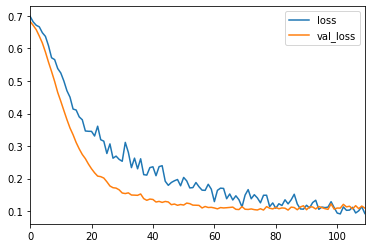

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [36]:
predictions = model.predict_classes(X_test)

W0404 12:00:45.548351 4349169088 deprecation.py:323] From <ipython-input-36-bc83193b8b59>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [39]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 2 86]]
